In [567]:
# Installing necessary modules from the text file
!pip install -r requirements.txt


In [568]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, LabelEncoder

In [569]:
df = pd.read_csv("diabetes_data.csv", sep=";")

In [570]:
df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


No fraud samples make up 38.46 % of the dataset.
Fraud samples make up 61.54 % of the dataset.


<AxesSubplot:xlabel='class', ylabel='count'>

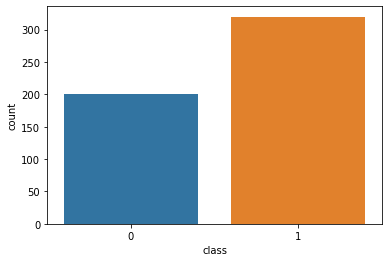

In [571]:
print("No fraud samples make up", round(df["class"].value_counts()[0] / len(df) * 100, 2), "% of the dataset.")
print("Fraud samples make up", round(df["class"].value_counts()[1] / len(df) * 100, 2), "% of the dataset.")

sns.countplot(x="class", data=df)

In [572]:
enc = LabelEncoder()
df["gender"] = enc.fit_transform(df["gender"].astype(str))

df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [573]:
scaler = MinMaxScaler()
normalized_df = df.copy()
normalized_df["age"] = scaler.fit_transform(normalized_df["age"].values.reshape(-1, 1))

normalized_df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,0.324324,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,0.567568,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,0.337838,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,0.391892,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,0.594595,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [574]:
normalized_non_diabetes = normalized_df[normalized_df["class"] == 0]
normalized_diabetes = normalized_df[normalized_df["class"] == 1]

# Shape of our dataframe elements.
data = {"Class": ["Non-Diabetes", "Diabetes"], "Shape": [normalized_non_diabetes.shape, normalized_diabetes.shape]}
info_df = pd.DataFrame(data)
info_df

,Class,Shape
0,Non-Diabetes,"(200, 17)"
1,Diabetes,"(320, 17)"


In [575]:
from sklearn.cluster import KMeans

clustered_df = df.copy()
X_clustered = clustered_df.drop("class", axis=1)
y_clustered = clustered_df["class"]

clustered_df["class"] = KMeans(n_clusters=2, random_state=0).fit_predict(X_clustered)
clustered_df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0


In [576]:
from sklearn.cluster import KMeans

clustered_normalized_df = normalized_df.copy()
X_clustered_normalized = clustered_normalized_df.drop("class", axis=1)
y_clustered_normalized = clustered_normalized_df["class"]

clustered_normalized_df["class"] = KMeans(n_clusters=2, random_state=0).fit_predict(X_clustered_normalized)
clustered_normalized_df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,0.324324,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,0
1,0.567568,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0
2,0.337838,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,0.391892,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,0
4,0.594595,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


C:\Users\uqi\.conda\envs\MachineLearning\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\uqi\.conda\envs\MachineLearning\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\uqi\.conda\envs\MachineLearning\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\uqi\.conda\envs\MachineLearning\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


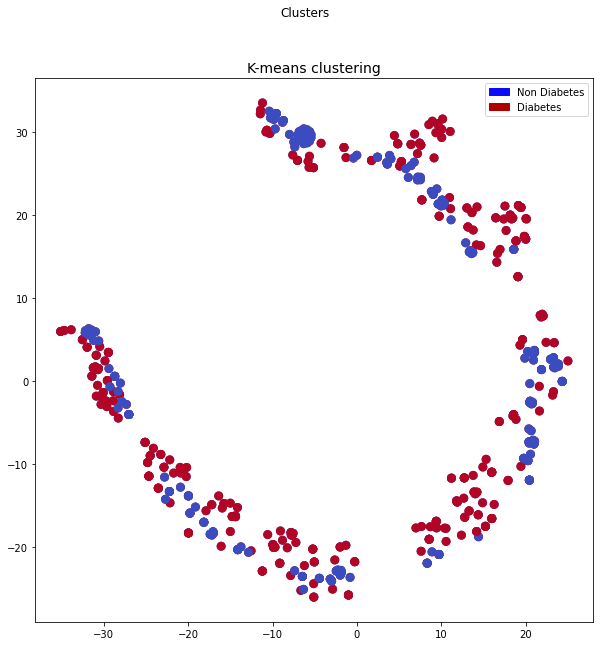

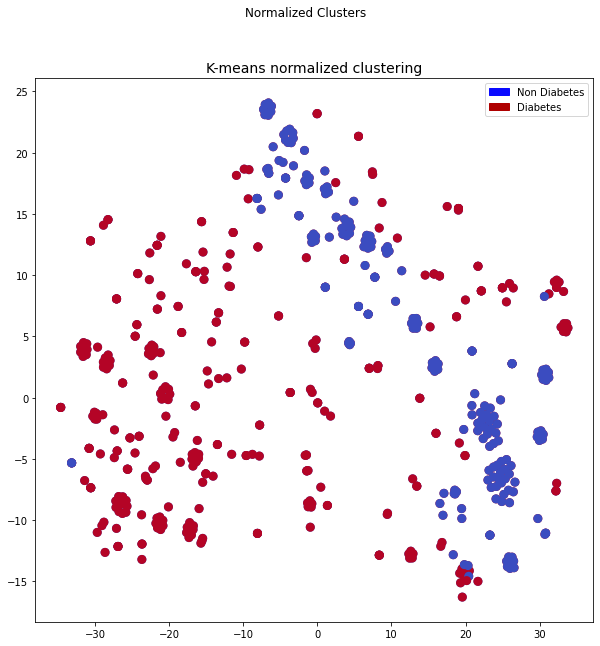

In [577]:
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches

reduced_X_tSNE = TSNE(n_components=2, random_state=0).fit_transform(X_clustered.values)
reduced_X_tSNE_normalized = TSNE(n_components=2, random_state=0).fit_transform(X_clustered_normalized.values)

f, (ax1) = plt.subplots(1, 1, figsize=(10, 10))
f.suptitle("Clusters")

#t-SNE scatter plot
ax1.scatter(reduced_X_tSNE[:, 0], reduced_X_tSNE[:, 1], c=(y_clustered == 0), cmap="coolwarm", label="Non Diabetes",
            linewidths=3)
ax1.scatter(reduced_X_tSNE[:, 0], reduced_X_tSNE[:, 1], c=(y_clustered == 1), cmap="coolwarm", label="Diabetes",
            linewidths=3)
ax1.set_title("K-means clustering", fontsize=14)
ax1.grid(False)

blue_legend = mpatches.Patch(color="#0A0AFF", label="Non Diabetes")
red_legend = mpatches.Patch(color="#AF0000", label="Diabetes")
ax1.legend(handles=[blue_legend, red_legend])

#

f, (ax1) = plt.subplots(1, 1, figsize=(10, 10))
f.suptitle("Normalized Clusters")

#t-SNE scatter plot
ax1.scatter(reduced_X_tSNE_normalized[:, 0], reduced_X_tSNE_normalized[:, 1], c=(y_clustered_normalized == 0),
            cmap="coolwarm", label="Non Diabetes", linewidths=3)
ax1.scatter(reduced_X_tSNE_normalized[:, 0], reduced_X_tSNE_normalized[:, 1], c=(y_clustered_normalized == 1),
            cmap="coolwarm", label="Diabetes", linewidths=3)
ax1.set_title("K-means normalized clustering", fontsize=14)
ax1.grid(False)

blue_legend = mpatches.Patch(color="#0A0AFF", label="Non Diabetes")
red_legend = mpatches.Patch(color="#AF0000", label="Diabetes")
ax1.legend(handles=[blue_legend, red_legend])